In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("data/train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.drop(columns=["Cabin"], inplace=True)


In [7]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
df["Age"] = df["Age"].fillna(df["Age"].median())


In [9]:
df["Age"].isnull().sum()


0

In [10]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [11]:
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
df["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

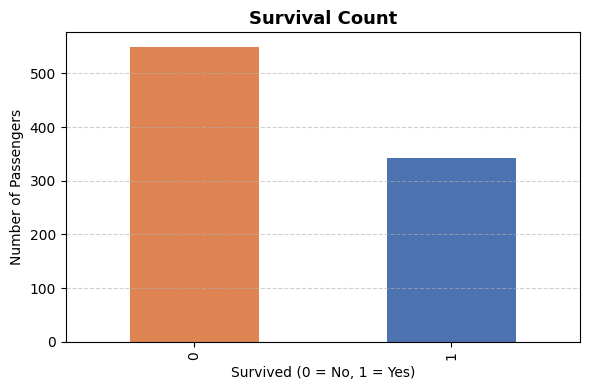

In [13]:
plt.figure(figsize=(6,4))

df["Survived"].value_counts().plot(
    kind="bar",
    color=["#DD8452", "#4C72B0"]
)

plt.title("Survival Count", fontsize=13, fontweight="bold")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/survival_count.png", dpi=300)
plt.show()


In [14]:
df.groupby("Sex")["Survived"].mean()


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

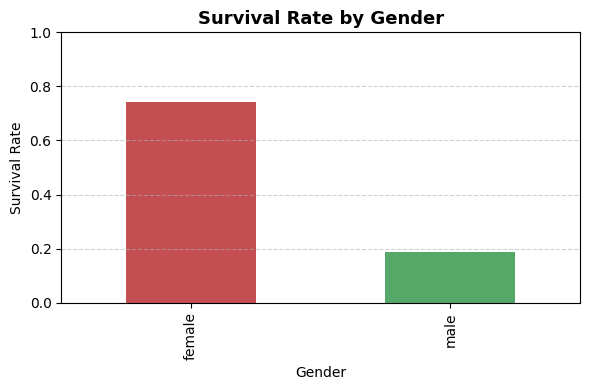

In [15]:
plt.figure(figsize=(6,4))

df.groupby("Sex")["Survived"].mean().plot(
    kind="bar",
    color=["#C44E52", "#55A868"]
)

plt.title("Survival Rate by Gender", fontsize=13, fontweight="bold")
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/survival_by_gender.png", dpi=300)
plt.show()


In [16]:
df.groupby("Pclass")["Survived"].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

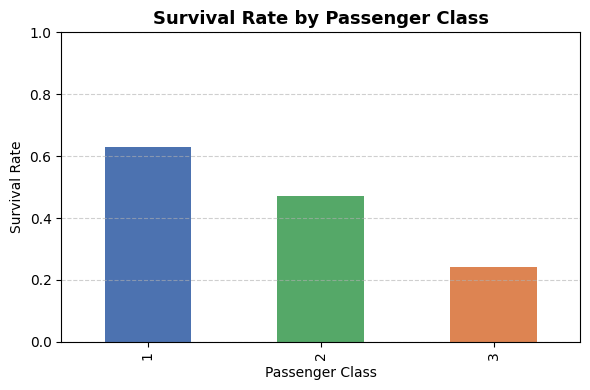

In [17]:
plt.figure(figsize=(6,4))

df.groupby("Pclass")["Survived"].mean().plot(
    kind="bar",
    color=["#4C72B0", "#55A868", "#DD8452"]
)

plt.title("Survival Rate by Passenger Class", fontsize=13, fontweight="bold")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/survival_by_class.png", dpi=300)
plt.show()


In [19]:
survived = df[df["Survived"] == 1]["Age"]
not_survived = df[df["Survived"] == 0]["Age"]


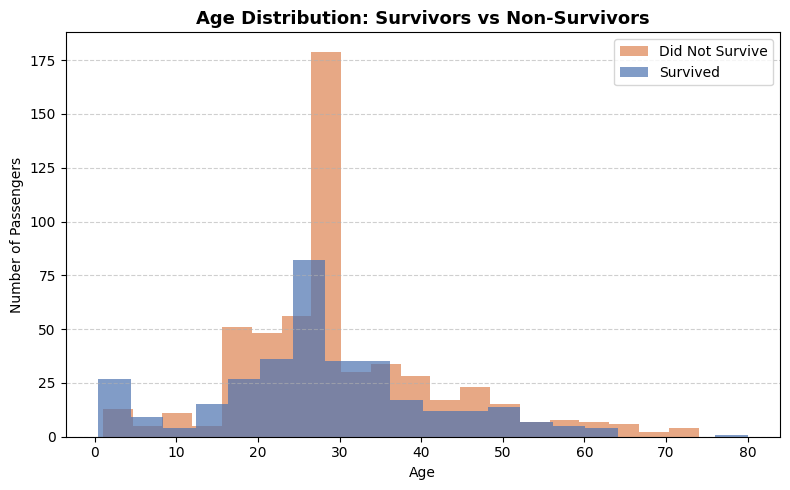

In [21]:
plt.figure(figsize=(8,5))

plt.hist(
    not_survived,
    bins=20,
    alpha=0.7,
    label="Did Not Survive",
    color="#DD8452"
)

plt.hist(
    survived,
    bins=20,
    alpha=0.7,
    label="Survived",
    color="#4C72B0"
)

plt.title("Age Distribution: Survivors vs Non-Survivors", fontsize=13, fontweight="bold")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")

plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.savefig("visualization/age_distribution_survival.png", dpi=300)
plt.show()
